In [26]:
import tensorflow as tf
import os
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
import numpy as np
import dill as dpickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
print(os.getcwd())
!ls

C:\Users\siddu\Documents\COURSES\ASE\Project
Clustering.ipynb
Decision Tree.ipynb
body_pp.dpkl
issues_labeller
issues_labeller.tar
predictor.ipynb
preprocess_data.ipynb
test_body_vecs.npy
test_labels.npy
test_title_vecs.npy
testdf.pkl
title_pp.dpkl
train_body_vecs.npy
train_labels.npy
train_model.ipynb
train_title_vecs.npy
traindf.pkl


In [33]:
 #load the training data and labels
train_title_vecs = np.load('train_title_vecs.npy')
train_body_vecs = np.load('train_body_vecs.npy')
train_label_vecs = np.load('train_labels.npy')

# create data frames
train_title_df = pd.DataFrame(train_title_vecs)
train_body_df = pd.DataFrame(train_body_vecs)
train_label_df = pd.DataFrame(train_label_vecs)

# club title and body
train_df = pd.concat([train_title_df, train_body_df], axis = 1)

print(train_df.shape)

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_df.head(30000))

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(labels[0:30])
#print(centroids)

train_labels = np.load('train_labels.npy')
print(train_labels[0:30])

res = kmeans.predict(train_df.head(1))
print(res)
print(train_label_df.head(1))

(1871144, 120)
[1 0 0 2 2 0 2 0 1 0 1 2 2 1 1 2 0 0 2 2 1 2 2 2 0 1 2 1 2 0]
[[0]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [2]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]]
[1]
   0
0  0


30000


C:\Users\siddu\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[0]
   0
0  0


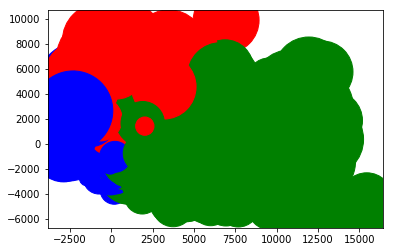

In [38]:
# Principle component analysis
pca = PCA(n_components = 3)

pca.fit(train_df.head(30000))

xs = pca.transform(train_df.head(30000))[:,0]
ys = pca.transform(train_df.head(30000))[:,1]
zs = pca.transform(train_df.head(30000))[:,2]

data_tuples = list(zip(xs,ys,zs))

data_df = pd.DataFrame(data_tuples)

kMeans = KMeans(n_clusters=3)
kMeans.fit(data_df)

pca_centroids = kMeans.cluster_centers_
pca_labels = kMeans.labels_

print(pca_labels.size)

color_list = [{0:"r",1:"g",2:"b"}[x] for x in pca_labels]

plt.scatter(xs, ys, zs, color=color_list)


pca_res = kMeans.predict(data_df.head(1))
print(pca_res)
print(train_label_df.head(1))